In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pyjoystick.sdl2 import Key, Joystick, run_event_loop
from pprint import pprint
from threading import Thread
import time
import serial
from sklearn import linear_model
import cv2

In [ ]:
cap = cv2.VideoCapture(0)
# set blue thresh
lower_green = np.array([35,70,60])
upper_green = np.array([120,255,255])

while True:
    ret, frame = cap.read()
    frame = cv2.resize(frame, None, fx = 1, fy = 1, interpolation = cv2.INTER_AREA)
    cv2.imshow('frame', frame)

    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv, lower_green, upper_green)
    # edges = cv2.Canny(mask, 100, 200)
    cv2.imshow('green edges', mask)
    if (cv2.waitKey(30) == 27):
        break

cap.release()
cv2.destroyAllWindows()

In [ ]:
edges = mask

In [ ]:
greenpos0 = []
greenpos1 = []
for (index0,liste) in enumerate(edges):
    for (index1,value) in enumerate(liste):
        if value == 255:
            greenpos0.append(index0)
            greenpos1.append(index1)
            # print(value)

In [ ]:
plt.figure(figsize = (2.4, 3.2))
plt.scatter(greenpos0, greenpos1, s = 1, marker = 'x')

In [ ]:
plt.figure(figsize = (2.4, 3.2))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(greenpos0, greenpos1, s = 1, marker = 'x')

In [ ]:
ransac = linear_model.RANSACRegressor()
ransac.fit(np.array(greenpos0).reshape(-1, 1), np.array(greenpos1).reshape(-1, 1))

line_X = np.arange(min(greenpos0), max(greenpos0) + 1)[:, np.newaxis]
line_y = ransac.predict(line_X)

In [ ]:
inlier_mask = ransac.inlier_mask_

In [ ]:
# plt.figure(figsize = (4.8, 6.4))
# plt.xlim((0, 480))
# plt.ylim((0, 640))
plt.scatter(greenpos0, greenpos1, s = 1, marker = 'x')
plt.plot(line_X, line_y, color='r')

In [ ]:
plt.figure(figsize = (4.8, 6.4))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(greenpos0, greenpos1, s = 1, marker = 'x')
plt.plot(line_X, line_y, color='r')

In [ ]:
inlier_mask = ransac.inlier_mask_

In [ ]:
plt.figure(figsize = (2.4, 3.2))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(np.array(greenpos0).reshape(-1, 1)[inlier_mask], np.array(greenpos1).reshape(-1, 1)[inlier_mask], s = 1, marker = 'x')

In [ ]:
np.linalg.norm((np.array(greenpos0).reshape(-1, 1)[inlier_mask][-1,0], np.array(greenpos1).reshape(-1, 1)[inlier_mask][-1,0]))

In [ ]:
np.linalg.norm((np.array(greenpos0).reshape(-1, 1)[inlier_mask][0,0], np.array(greenpos1).reshape(-1, 1)[inlier_mask][0,0]))

In [ ]:
np.array(greenpos1).reshape(-1, 1)[inlier_mask][0,0]

In [ ]:
Servo_t = [0, 29.85799098, 87.28123918, 49.99237628, 23.27381264], [54.25188891, 14.62139926, 51.21600907, 64.9204633, 113.30784031]

A_t = [[-0.96566657, 0.49763318, 0.95705414, -0.62148105, -0.44530939], [0.90419815, -0.66050816, 0.60991016, 0.22840757, 0.80645628]]

s_t = [[391, 402, 363, 365, 325], [360, 320, 441, 434, 471]]

In [ ]:
plt.figure(figsize = (6, 8))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(s_t[0], s_t[1], s = 20, marker = 'x')

In [ ]:
plt.scatter(Servo_t[0], Servo_t[1], s = 20, marker = 'x')

In [ ]:
plt.figure(figsize = (6, 8))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(s_t[0], s_t[1], s = 20, marker = 'x')

plt.figure(figsize = (8, 8))
plt.xlim((0, 180))
plt.ylim((0, 180))
plt.scatter(Servo_t[0], Servo_t[1], s = 20, marker = 'x')
plt.show()

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)
ret, frame = cap.read()
print(ret)
if ret :
    print(ret)
    cv2.imwrite('./first_frame.jpg', frame)
    # cv2.imshow('test', frame)

# cap.release()
# cv2.destroyAllWindows()

### Load data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
with open('./data.npy', 'rb') as f:
    Servo_t = np.load(f)
    A_t = np.load(f)
    s_t = np.load(f)
    
print(np.shape(Servo_t), np.shape(A_t), np.shape(s_t))

In [ ]:
s_t[0, 0], s_t[1, 0]

In [ ]:
plt.figure(figsize = (6, 8))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.title('green point position')
# plt.plot(s_t[0], s_t[1])
plt.scatter(s_t[0], s_t[1], s = 20, marker = 'x')

plt.figure(figsize = (8, 8))
plt.xlim((-0.1, 180.1))
plt.ylim((-0.1, 180.1))
# plt.plot(Servo_t[0], Servo_t[1])
plt.title('Servo angle inputs')
plt.scatter(Servo_t[0], Servo_t[1], s = 20, marker = 'x')
plt.show()

### reward fonction

In [ ]:
def reward(s_pos, target_pos):
    # reward(s_t[:, 0], s_t[:, 1])
    reward = np.linalg.norm(s_pos - target_pos)
    return reward

In [ ]:
min(s_t[0, :]), max(s_t[0, :]), min(s_t[1, :]), max(s_t[1, :])

In [ ]:
s_t[:, 0]

### reward figure

In [ ]:
plt.plot(lis)
episode = 10
file_name = './img' + str(episode) + '.png'
plt.savefig(file_name)
plt.close()

### tensorflow network

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import linear_model
import cv2
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [ ]:
import tensorflow as tf
from sklearn import datasets
import numpy as np
import random

x_train = datasets.load_iris().data
y_train = datasets.load_iris().target

np.random.seed(120)
np.random.shuffle(x_train)
np.random.seed(120)
np.random.shuffle(y_train)

tf.random.set_seed(120)

In [ ]:
tf.shape(x_train), tf.shape(y_train)

In [ ]:
x_train[0], y_train[0]

In [ ]:
np.shape(x_train), np.shape(y_train)

In [ ]:
# #第三步，models.Sequential()
# model = tf.keras.models.Sequential([ #使用models.Sequential()来搭建神经网络
#     tf.keras.layers.Dense(3, activation = "softmax", kernel_regularizer = tf.keras.regularizers.l2()) #全连接层，三个神经元，激活函数为softmax,使用l2正则化
# ])

In [ ]:
class irisModel(tf.keras.Model):
    def __init__(self):
        super(irisModel, self).__init__()
        self.d1 = tf.keras.layers.Dense(3, activation="softmax", kernel_regularizer=tf.keras.regularizers.l2()) #搭建网络块，这一层命名为d1
 
    def call(self, x):
        y = self.d1(x)
        return  y

model = irisModel()

#第四步，model.compile()
model.compile(  #使用model.compile()方法来配置训练方法
    optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1), #使用SGD优化器，学习率为0.1
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False), #配置损失函数
    metrics = ['sparse_categorical_accuracy'] #标注网络评价指标
)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
#第五步，model.fit()
model.fit(  #使用model.fit()方法来执行训练过程，
    x_train, y_train, #告知训练集的输入以及标签，
    batch_size = 32, #每一批batch的大小为32，
    epochs = 500, #迭代次数epochs为500
    validation_split = 0.2, #从数据集中划分20%给测试集
    validation_freq = 20 #测试的间隔次数为20,每迭代20次测试一次准确率
)

#第六步，model.summary()
model.summary() #打印神经网络结构，统计参数数目

### create dataset

In [1]:
import numpy as np
from DQ_Learning import DQNet
import tensorflow as tf


with open('/home/mig5/Desktop/TR_DATA_RL/minibatch.npy', 'rb') as f:
    minibatch = np.load(f, allow_pickle=True)
    # experience = np.load(f, allow_pickle=True)

print(np.shape(minibatch))
DQL = DQNet()

x_train, y_train = [], []

for (i, mini) in enumerate(minibatch):
    value_ = DQL.get_best(mini[4], mini[1], get_action = False)
    y_train.append(mini[3] + 0.99*value_)
    x_train.append([mini[0][0], mini[0][1], mini[1][0], mini[1][1], mini[2]])

(500, 5)
value 0.6450147
value -0.08118695
value -0.23150498
value -0.2319426
value 0.59114623
value -0.75850475
value 0.3269378
value 0.59114623
value 0.59114623
value 0.32373512
value 0.32373512
value 0.2580397
value -0.40707892
value -0.7586149
value -0.23150408
value -0.23150408
value 0.59114623
value -0.23150408
value 0.59114623
value -0.75803894
value -0.23150408
value 0.3095544
value 0.26861793
value -0.40707913
value 0.323735
value 0.3612615
value 0.32373512
value 0.32373512
value 0.32373512
value 0.32373512
value 0.59114623
value 0.59114623
value 0.5911461
value 0.59114623
value -0.7569668
value 0.32373512
value 0.32373512
value 0.59114623
value -0.23150408
value -1.4240078
value 0.59114456
value 0.32373512
value 0.59114623
value -0.23150408
value 0.59114623
value 0.59114623
value 0.32373512
value -0.40707913
value 0.64731544
value 0.59114623
value 0.59114623
value 0.59114623
value 0.59114623
value 0.59114623
value -0.75861394
value -0.23150408
value 0.32373512
value 0.5911462

In [2]:
# checkpoint_path = "cp.ckpt"

# # Create a callback that saves the model's weights
# cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
#                                                  save_weights_only=True,
#                                                  verbose=1)
DQL.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.0001),
            loss = tf.keras.losses.MeanSquaredError(),
            metrics = 'mae')
# Train the model with the new callback
DQL.fit(np.array(x_train),
        np.array(y_train),
        epochs=500)
# DQL.save_weights('/home/mig5/Desktop/TR_DATA_RL/project_RL/deepqlearning_model')

Epoch 1/500
16/16 [==============================] - 0s 1ms/step - loss: 43911.7266 - mae: 176.4142
Epoch 2/500
16/16 [==============================] - 0s 3ms/step - loss: 42961.1797 - mae: 173.7402
Epoch 3/500
16/16 [==============================] - 0s 2ms/step - loss: 42080.9453 - mae: 171.3190
Epoch 4/500
16/16 [==============================] - 0s 2ms/step - loss: 41160.9570 - mae: 168.7957
Epoch 5/500
16/16 [==============================] - 0s 2ms/step - loss: 40261.5469 - mae: 166.3499
Epoch 6/500
16/16 [==============================] - 0s 3ms/step - loss: 39397.1562 - mae: 164.0227
Epoch 7/500
16/16 [==============================] - 0s 3ms/step - loss: 38555.3516 - mae: 161.7339
Epoch 8/500
16/16 [==============================] - 0s 3ms/step - loss: 37745.5469 - mae: 159.5746
Epoch 9/500
16/16 [==============================] - 0s 2ms/step - loss: 36959.1992 - mae: 157.4209
Epoch 10/500
16/16 [==============================] - 0s 2ms/step - loss: 36196.5859 - mae: 155.3671

In [5]:
DQL.get_best(mini[4], mini[1], get_action = True)

1

In [12]:
import tensorflow as tf
from DQ_Learning import DQNet
import numpy as np

checkpoint_path = "/home/mig5/Desktop/TR_DATA_RL/project_RL/deepqlearning_model"
model = DQNet()
model.load_weights(checkpoint_path)

model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1),
            loss = tf.keras.losses.MeanAbsoluteError(),
            metrics = 'mae')

# Re-evaluate the model
loss, acc = model.evaluate(np.array(x_train), np.array(y_train), verbose=2)

4/4 - 0s - loss: 16.2087 - mae: 16.2087 - 169ms/epoch - 42ms/step


In [18]:
DQL.fit(np.array(x_train), np.array(y_train),
        batch_size = 64, #每一批batch的大小为32，
        epochs = 200, #迭代次数epochs为500
        validation_split = 0.2, #从数据集中划分20%给测试集
        validation_freq = 20)

Epoch 1/200
2/2 [==============================] - 0s 7ms/step - loss: 3584353.2500 - mae: 3584353.2500
Epoch 2/200
2/2 [==============================] - 0s 4ms/step - loss: 266493520.0000 - mae: 266493520.0000
Epoch 3/200
2/2 [==============================] - 0s 4ms/step - loss: 154.0703 - mae: 154.0703
Epoch 4/200
2/2 [==============================] - 0s 6ms/step - loss: 114.6900 - mae: 114.6900
Epoch 5/200
2/2 [==============================] - 0s 4ms/step - loss: 114.4900 - mae: 114.4900
Epoch 6/200
2/2 [==============================] - 0s 4ms/step - loss: 114.2900 - mae: 114.2900
Epoch 7/200
2/2 [==============================] - 0s 3ms/step - loss: 114.0900 - mae: 114.0900
Epoch 8/200
2/2 [==============================] - 0s 6ms/step - loss: 113.8900 - mae: 113.8900
Epoch 9/200
2/2 [==============================] - 0s 4ms/step - loss: 113.6900 - mae: 113.6900
Epoch 10/200
2/2 [==============================] - 0s 4ms/step - loss: 113.4900 - mae: 113.4900
Epoch 11/200
2/2 [=

In [11]:
import numpy as np

with open('../target_pos_list.npy', 'rb') as f:
    target_pos_list = np.load(f)

In [12]:
np.shape(target_pos_list)

(58, 2)

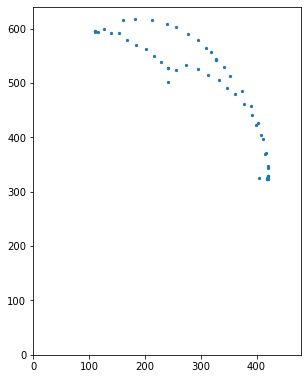

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize = (4.8, 6.4))
plt.xlim((0, 480))
plt.ylim((0, 640))
plt.scatter(target_pos_list[:, 0], target_pos_list[:, 1], s = 5)

In [14]:
minibatch = np.load('../minibatch.npy', allow_pickle=True)

In [7]:
np.shape(minibatch)

(12, 5)

In [17]:
minibatch[0]

array([(419, 332), list([295, 525]), 6, -229.40139493908924,
       list([419, 332])], dtype=object)

In [18]:
import tarfile
from DQ_Learning import DQNet, environment, mask_detect, top_detection
import os
import tensorflow as tf
import numpy as np


with open('../target_pos_list.npy', 'rb') as f:
    target_pos_list = np.load(f)
    
target_idx = np.random.randint(0, len(target_pos_list))
target_pos = [target_pos_list[target_idx][0], target_pos_list[target_idx][1]]
print(target_pos)

checkpoint_path = "./deepqlearning_model"
checkpoint_dir  = os.path.dirname(checkpoint_path)
model = DQNet()
envir = environment()
model.load_weights(checkpoint_path)
model.compile(  optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1),
                loss = tf.keras.losses.MeanSquaredError(),
                metrics = 'mae')

[421, 328]


In [19]:
for i in range(6):
    a = model.get_best(   state_current = [i*100, 320],
                            target_pos = [421, 328],
                            get_action = True)
    print(a)

9
9
9
9
9
9


In [20]:
model.call(inputs = tf.constant([[420, 320, 420, 524, 1]])).numpy()[0][0] == model.call(inputs = tf.constant([[420, 320, 420, 524, 2]])).numpy()[0][0]

True

In [21]:
for i in range(9):
    print(model.call(inputs = tf.constant([[3000, 320, 100, 603, i+1]])).numpy()[0][0])

-1764.6594
-1764.6594
-1764.6594
-1764.6594
-1764.6594
-1764.6594
-1764.6594
-1764.6594
-1764.6594
